Step 1: Store the dataset in a panadas dataframe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = pd.read_csv('IRIS.csv')
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Understand the data

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataframe.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Step 3: Data visualization

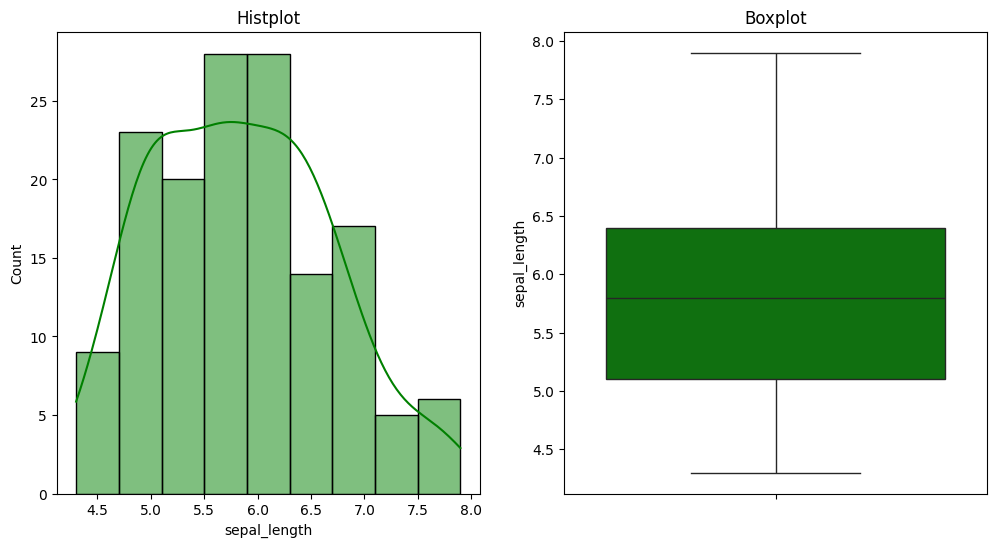

In [ ]:
c='Green'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(dataframe['sepal_length'], kde=True, color=c)
plt.title('Histplot')
plt.subplot(1,2,2)
sns.boxplot(dataframe['sepal_length'], color=c)
plt.title('Boxplot')
plt.show()

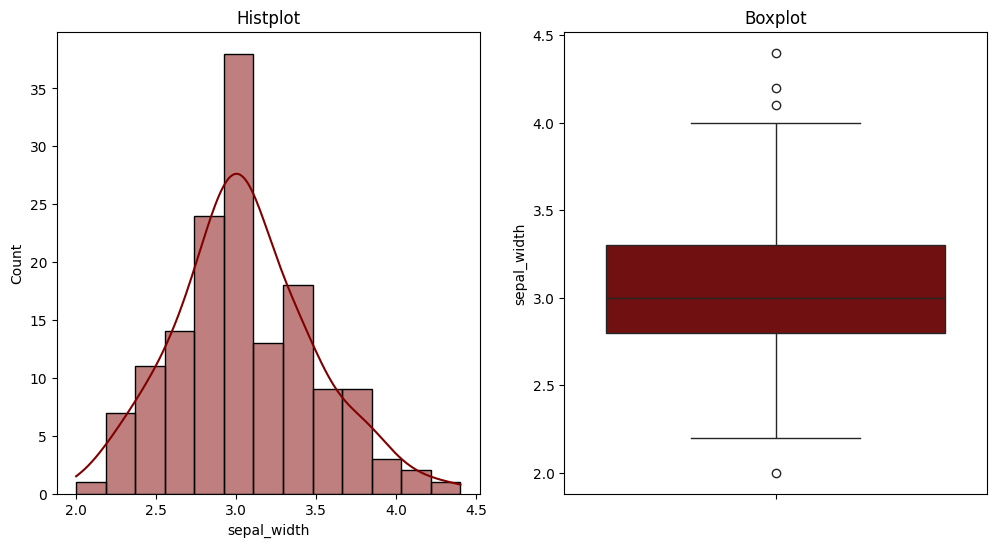

In [ ]:
c='Maroon'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(dataframe['sepal_width'], kde=True, color=c)
plt.title('Histplot')
plt.subplot(1,2,2)
sns.boxplot(dataframe['sepal_width'], color=c)
plt.title('Boxplot')
plt.show()

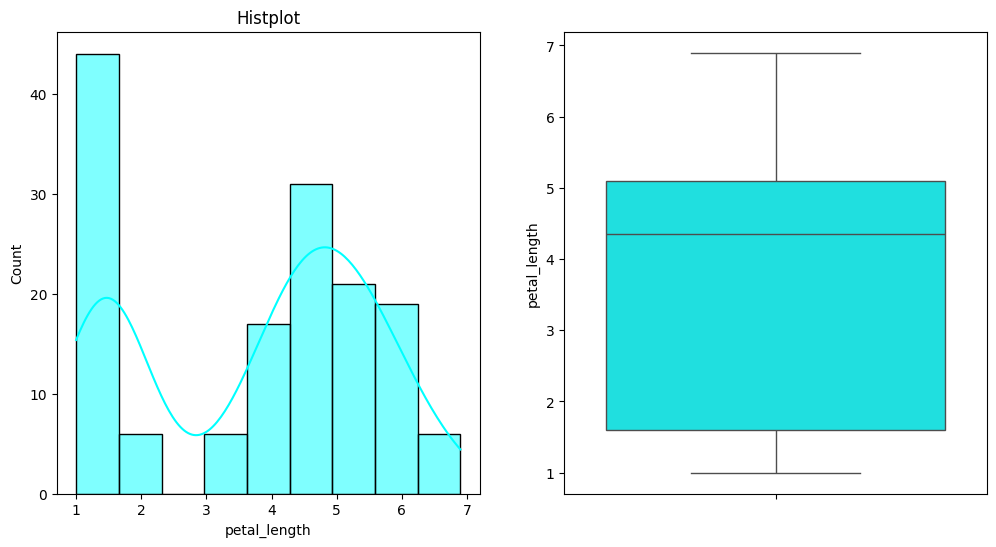

In [ ]:
c='Cyan'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(dataframe['petal_length'], kde=True, color=c)
plt.title('Histplot')
plt.subplot(1,2,2)
sns.boxplot(dataframe['petal_length'], color=c)
plt.show()

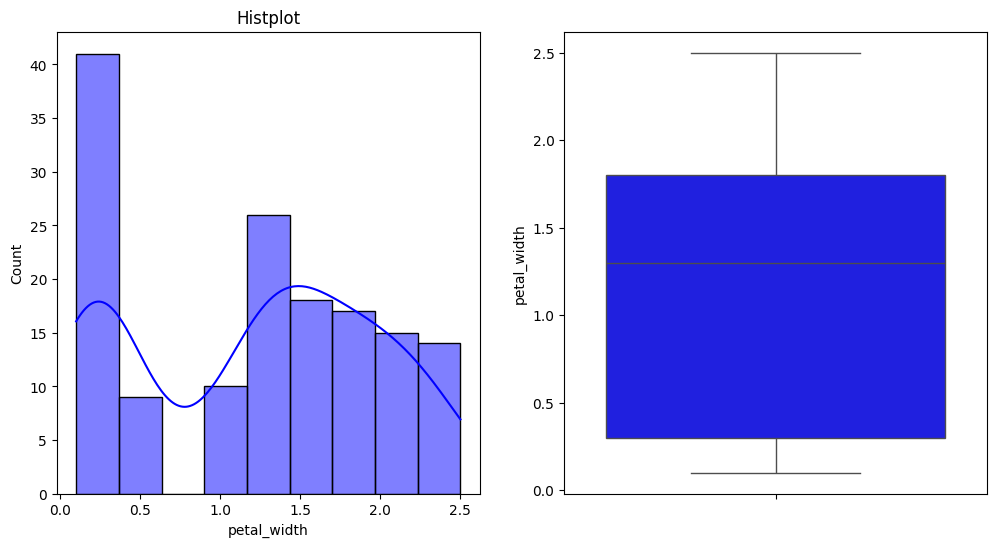

In [ ]:
c='Blue'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(dataframe['petal_width'], kde=True, color=c)
plt.title('Histplot')
plt.subplot(1,2,2)
sns.boxplot(dataframe['petal_width'], color=c)
plt.show()

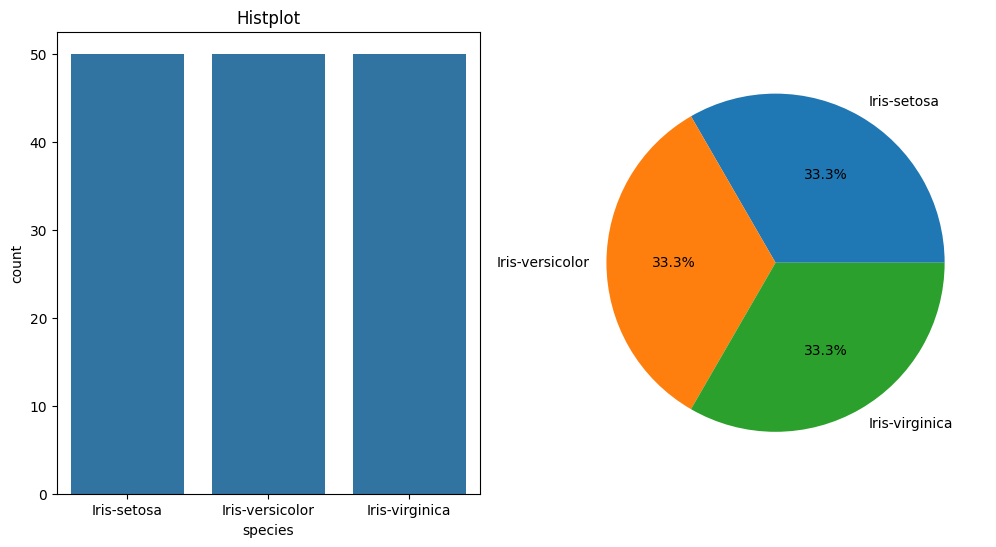

In [ ]:
c='Pink'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='species', data=dataframe)
plt.title('Histplot')
plt.subplot(1,2,2)
plt.pie(dataframe['species'].value_counts(), labels=dataframe['species'].unique(), autopct='%1.1f%%')
plt.show()

Step 4: Replacing outliers with median

In [ ]:
#Ouliers replacement using median
Q1 = dataframe['sepal_width'].quantile(0.25)
Q3 = dataframe['sepal_width'].quantile(0.75)
Q2 = np.median(dataframe['sepal_width'])
IQR = Q3 - Q1
up_limit = Q3 + 1.5*IQR
low_limit = Q1 - 1.5*IQR

def replace_outliers_iqr(dataframe, column_name, Q1, Q2, Q3, IQR, up_limit, low_limit):
    dataframe[column_name] = np.where((dataframe[column_name] < low_limit) | (dataframe[column_name] > up_limit), Q2, dataframe[column_name])
    return dataframe

df = replace_outliers_iqr(dataframe, 'sepal_width', Q1, Q2, Q3, IQR, up_limit, low_limit)

Step 5: Plotting bi-variate features vs target

<Axes: xlabel='species', ylabel='sepal_length'>

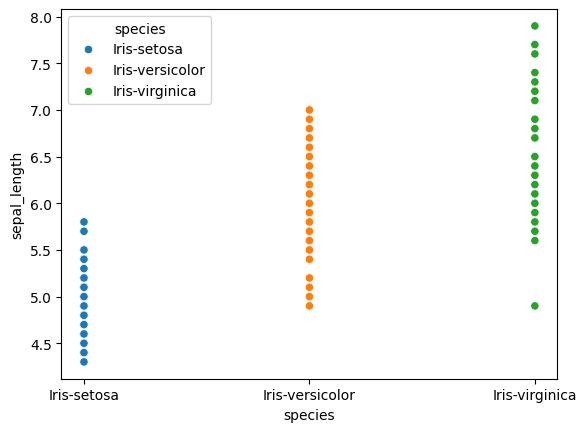

In [ ]:
sns.scatterplot(y='sepal_length', x='species', hue='species', data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

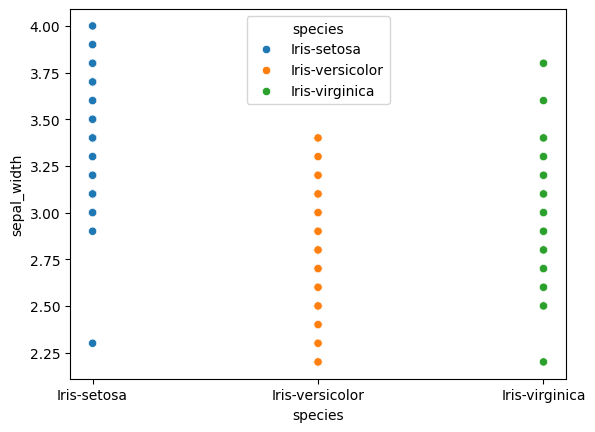

In [ ]:
sns.scatterplot(x='species', y='sepal_width', hue='species', data=df)

<Axes: xlabel='species', ylabel='petal_length'>

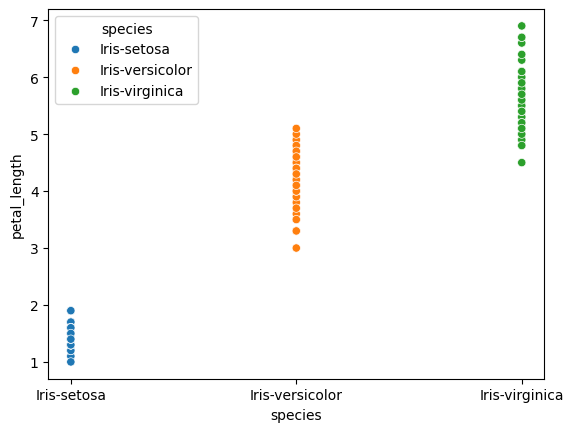

In [ ]:
sns.scatterplot(x='species', y='petal_length', hue='species', data=df)

<Axes: xlabel='species', ylabel='petal_width'>

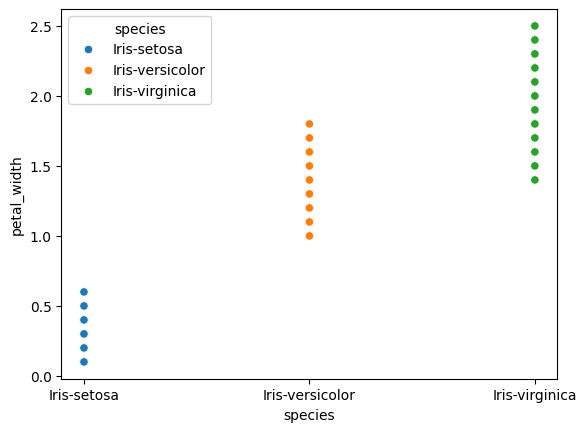

In [ ]:
sns.scatterplot(x='species', y='petal_width', hue='species', data=df)

Step 6: Using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

data = df.values
X = data[:, 0:4]
y = data[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Validation Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Training Accuracy: 0.975
Training Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.95      0.96        41
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       120
      macro avg       0.97      0.98      0.97       120
   weighted avg       0.98      0.97      0.98       120

Validation Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
raw_data = input("Enter: ")
inputs = raw_data.split(' ')
inputs = [float(i) for i in inputs]
conv_data = np.array(inputs)
conv_data = conv_data.reshape(1, -1)
conv_data_pred = svc.predict(conv_data)
print(np.array2string(conv_data_pred))

Enter: 6.2 2.9 4.3 1.3
['Iris-versicolor']
